## **Librerias**

In [10]:
import pandas as pd
import numpy as np

## **Preparación de Datos**

In [11]:
df_op = pd.read_csv(r'..\data\solicitudes_credito_simuladas.csv')
#
df_cl = pd.read_csv(r'..\data\resultados_evaluador.csv')
#
df_cl = df_cl.rename(columns={'cliente_id': 'id', 'decision_final': 'decision_agentai'})
#
df_join = df_op.merge(df_cl, on='id', how='left')
#
df_join['aux_decision'] = np.where(df_join['decision_agentai'] == df_join['decision_final'], 1, 0)

## **Exploración de Resultados**

<AxesSubplot:title={'center':'Decision AI vs Decision Final'}, ylabel='aux_decision'>

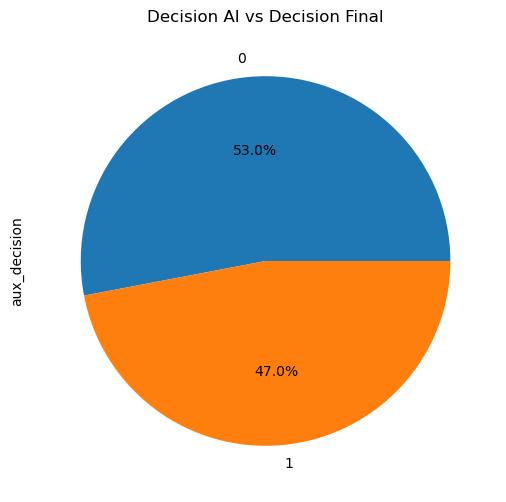

In [15]:
df_join['aux_decision'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), title='Decision AI vs Decision Final')

<AxesSubplot:title={'center':'Decision Final'}, ylabel='decision_final'>

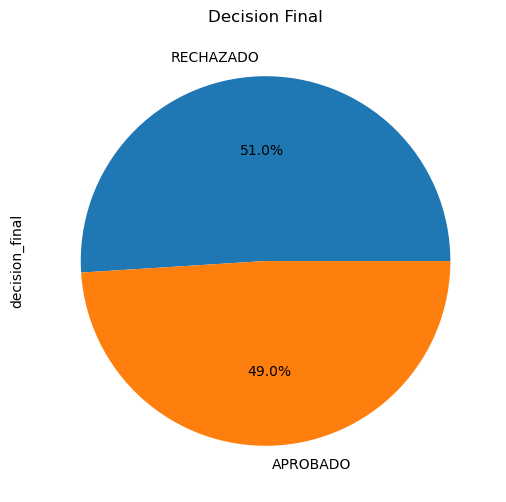

In [18]:
df_join['decision_final'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), title='Decision Final')

<AxesSubplot:title={'center':'Decision AI'}, ylabel='decision_agentai'>

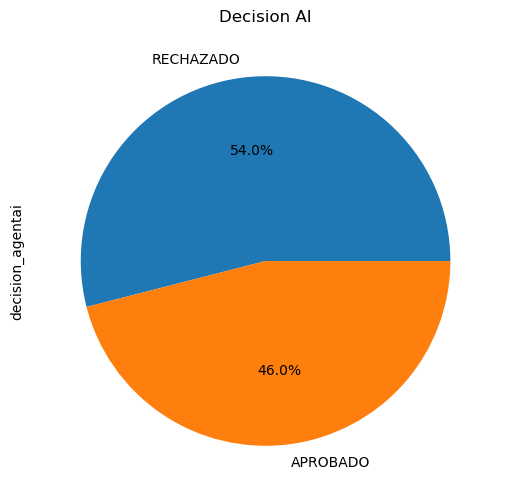

In [17]:
df_join['decision_agentai'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), title='Decision AI')

## **Regla Ingresos Mensuales**

In [22]:
df_join.query("ingresos_mensuales <= 1_500_000").shape[0]

13

In [19]:
df_join.query("ingresos_mensuales <= 1_500_000")['decision_final'].value_counts(normalize=True)

RECHAZADO    0.538462
APROBADO     0.461538
Name: decision_final, dtype: float64

In [20]:
df_join.query("ingresos_mensuales <= 1_500_000")['decision_agentai'].value_counts(normalize=True)

RECHAZADO    0.692308
APROBADO     0.307692
Name: decision_agentai, dtype: float64

In [23]:
df_join.query("ingresos_mensuales <= 1_500_000 and decision_final == 'APROBADO'")

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_agentai,justificacion_agente,aux_decision
37,38,58,1311349,Valle,0,425,Eventos especiales,APROBADO,RECHAZADO,El cliente no cumple con los requisitos mínimo...,0
40,41,60,1487726,Cundinamarca,1,533,Vacaciones familiares,APROBADO,RECHAZADO,El solicitante no cumple con los criterios de ...,0
42,43,41,1408535,Bogotá,1,718,Eventos especiales,APROBADO,APROBADO,El cliente cumple con la mayoría de los criter...,1
45,46,60,865624,Santander,1,739,Compra de electrodomésticos,APROBADO,RECHAZADO,El cliente cumple con la edad y el score credi...,0
54,55,47,1007923,Antioquia,1,610,Vacaciones familiares,APROBADO,RECHAZADO,El cliente no cumple con el requisito de ingre...,0
69,70,60,1410927,Cundinamarca,1,722,Eventos especiales,APROBADO,APROBADO,"El cliente es recurrente, tiene un buen score ...",1


## **Regla Score < 600**

In [25]:
df_join.query("score_crediticio < 600").shape[0]

54

In [24]:
df_join.query("score_crediticio < 600")['decision_final'].value_counts(normalize=True)

RECHAZADO    0.5
APROBADO     0.5
Name: decision_final, dtype: float64

In [26]:
df_join.query("score_crediticio < 600")['decision_agentai'].value_counts(normalize=True)

RECHAZADO    0.962963
APROBADO     0.037037
Name: decision_agentai, dtype: float64

In [27]:
df_join.query("score_crediticio < 600 and decision_agentai == 'APROBADO'")

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_agentai,justificacion_agente,aux_decision
20,21,61,2468587,Antioquia,1,482,Tratamiento médico,RECHAZADO,APROBADO,"A pesar de que el score crediticio es bajo, la...",0
60,61,59,1770107,Cundinamarca,0,530,Pago de estudios de posgrado,APROBADO,APROBADO,"A pesar de ser cliente nuevo, los ingresos sup...",1


In [30]:
df_join.query("score_crediticio < 600")['es_cliente'].value_counts(normalize=True)

0    0.555556
1    0.444444
Name: es_cliente, dtype: float64

In [29]:
df_join.query("score_crediticio < 600").groupby('es_cliente', as_index=False)['decision_agentai'].value_counts(normalize=True)

,es_cliente,decision_agentai,proportion
0,0,RECHAZADO,0.966667
1,0,APROBADO,0.033333
2,1,RECHAZADO,0.958333
3,1,APROBADO,0.041667


In [28]:
df_join.query("score_crediticio < 600").groupby('es_cliente', as_index=False)['decision_final'].value_counts(normalize=True)

,es_cliente,decision_final,proportion
0,0,APROBADO,0.566667
1,0,RECHAZADO,0.433333
2,1,RECHAZADO,0.583333
3,1,APROBADO,0.416667


## **Regla Justificación Viajes**

In [31]:
df_join.query("justificacion in ('Vacaciones familiares', 'Viaje a Europa')").shape[0]

23

In [32]:
df_join.query("justificacion in ('Vacaciones familiares', 'Viaje a Europa')")['decision_final'].value_counts(normalize=True)

RECHAZADO    0.608696
APROBADO     0.391304
Name: decision_final, dtype: float64

In [33]:
df_join.query("justificacion in ('Vacaciones familiares', 'Viaje a Europa')")['decision_agentai'].value_counts(normalize=True)

RECHAZADO    0.652174
APROBADO     0.347826
Name: decision_agentai, dtype: float64

In [36]:
df_join.query("justificacion in ('Vacaciones familiares', 'Viaje a Europa') and decision_agentai == 'APROBADO' and aux_decision == 0")

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_agentai,justificacion_agente,aux_decision
7,8,26,3259357,Santander,1,695,Vacaciones familiares,RECHAZADO,APROBADO,El cliente cumple con la mayoría de los requis...,0
10,11,63,3039572,Bogotá,0,673,Vacaciones familiares,RECHAZADO,APROBADO,El solicitante cumple con la mayoría de los cr...,0
32,33,29,4338999,Antioquia,1,636,Vacaciones familiares,RECHAZADO,APROBADO,El cliente cumple con los requisitos de edad e...,0
39,40,64,2773033,Cundinamarca,0,691,Vacaciones familiares,RECHAZADO,APROBADO,El cliente cumple con la mayoría de los criter...,0
55,56,31,1706771,Cundinamarca,0,640,Vacaciones familiares,RECHAZADO,APROBADO,El cliente cumple con la mayoría de los criter...,0


In [37]:
df_join.query("justificacion in ('Vacaciones familiares', 'Viaje a Europa') and decision_agentai == 'RECHAZADO' and aux_decision == 0")

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_agentai,justificacion_agente,aux_decision
31,32,46,3646276,Bogotá,0,498,Vacaciones familiares,APROBADO,RECHAZADO,La solicitud es rechazada debido a un score cr...,0
40,41,60,1487726,Cundinamarca,1,533,Vacaciones familiares,APROBADO,RECHAZADO,El solicitante no cumple con los criterios de ...,0
54,55,47,1007923,Antioquia,1,610,Vacaciones familiares,APROBADO,RECHAZADO,El cliente no cumple con el requisito de ingre...,0
58,59,64,3577886,Bogotá,0,533,Viaje a Europa,APROBADO,RECHAZADO,El cliente es nuevo y tiene un score creditici...,0
67,68,63,1511316,Valle,1,447,Vacaciones familiares,APROBADO,RECHAZADO,El solicitante es un cliente recurrente de 63 ...,0
68,69,35,2470422,Antioquia,0,423,Vacaciones familiares,APROBADO,RECHAZADO,El solicitante es un cliente nuevo con un scor...,0


## **Regla Tipo de Cliente**

In [38]:
df_join.groupby('es_cliente', as_index=False)['decision_final'].value_counts(normalize=True)

,es_cliente,decision_final,proportion
0,0,APROBADO,0.527273
1,0,RECHAZADO,0.472727
2,1,RECHAZADO,0.555556
3,1,APROBADO,0.444444


In [39]:
df_join.groupby('es_cliente', as_index=False)['decision_agentai'].value_counts(normalize=True)

,es_cliente,decision_agentai,proportion
0,0,RECHAZADO,0.527273
1,0,APROBADO,0.472727
2,1,RECHAZADO,0.555556
3,1,APROBADO,0.444444


In [41]:
df_join.groupby('es_cliente', as_index=False)['aux_decision'].value_counts(normalize=True)

,es_cliente,aux_decision,proportion
0,0,0,0.527273
1,0,1,0.472727
2,1,0,0.533333
3,1,1,0.466667


In [43]:
df_join['region_antioquia_bogota'] = df_join['region'].isin(['Antioquia', 'Bogotá']).astype(int)

In [47]:
df_join.query("region_antioquia_bogota == 1").shape[0]

40

In [45]:
df_join.query("region_antioquia_bogota == 1").groupby('es_cliente', as_index=False)['decision_final'].value_counts(normalize=True)

,es_cliente,decision_final,proportion
0,0,RECHAZADO,0.55
1,0,APROBADO,0.45
2,1,RECHAZADO,0.60
3,1,APROBADO,0.40


In [46]:
df_join.query("region_antioquia_bogota == 1").groupby('es_cliente', as_index=False)['decision_agentai'].value_counts(normalize=True)

,es_cliente,decision_agentai,proportion
0,0,RECHAZADO,0.65
1,0,APROBADO,0.35
2,1,APROBADO,0.55
3,1,RECHAZADO,0.45


In [53]:
df_join.query("es_cliente == 0 and region_antioquia_bogota == 1 and aux_decision == 0")

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_agentai,justificacion_agente,aux_decision,region_antioquia_bogota
5,6,69,3623559,Bogotá,0,594,Compra de electrodomésticos,APROBADO,RECHAZADO,El cliente es nuevo y su score crediticio es i...,0,1
10,11,63,3039572,Bogotá,0,673,Vacaciones familiares,RECHAZADO,APROBADO,El solicitante cumple con la mayoría de los cr...,0,1
24,25,54,4349538,Antioquia,0,559,Pago de deudas,APROBADO,RECHAZADO,El solicitante no cumple con el score creditic...,0,1
25,26,49,4587340,Bogotá,0,515,Compra de electrodomésticos,APROBADO,RECHAZADO,El score crediticio del cliente es inferior a ...,0,1
28,29,38,4871951,Antioquia,0,692,Eventos especiales,RECHAZADO,APROBADO,El cliente cumple con la mayoría de los requis...,0,1
31,32,46,3646276,Bogotá,0,498,Vacaciones familiares,APROBADO,RECHAZADO,La solicitud es rechazada debido a un score cr...,0,1
52,53,23,3801521,Antioquia,0,741,Compra de electrodomésticos,RECHAZADO,APROBADO,"El cliente cumple con los criterios de edad, i...",0,1
58,59,64,3577886,Bogotá,0,533,Viaje a Europa,APROBADO,RECHAZADO,El cliente es nuevo y tiene un score creditici...,0,1
68,69,35,2470422,Antioquia,0,423,Vacaciones familiares,APROBADO,RECHAZADO,El solicitante es un cliente nuevo con un scor...,0,1
77,78,45,2081823,Antioquia,0,612,Pago de deudas,RECHAZADO,APROBADO,El cliente cumple con la mayoría de los criter...,0,1


## **Regla Justificación Salud y Educación**

In [54]:
df_join.query(" justificacion in ('Tratamiento médico', 'Pago de estudios de posgrado') and ingresos_mensuales <= 1_500_000")

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_agentai,justificacion_agente,aux_decision,region_antioquia_bogota
27,28,35,1365394,Bogotá,1,436,Tratamiento médico,RECHAZADO,RECHAZADO,El cliente no cumple con el score crediticio m...,1,1
50,51,56,881115,Bogotá,0,476,Tratamiento médico,RECHAZADO,RECHAZADO,La solicitud es rechazada debido a un puntaje ...,1,1
79,80,70,963845,Santander,1,644,Pago de estudios de posgrado,RECHAZADO,APROBADO,A pesar de que el cliente tiene 70 años y sus ...,0,0


In [57]:
df_join.query(" justificacion in ('Tratamiento médico', 'Pago de estudios de posgrado') and ingresos_mensuales > 1_500_000").shape[0]

15

In [62]:
df_join.query(" justificacion in ('Tratamiento médico', 'Pago de estudios de posgrado') and ingresos_mensuales > 1_500_000")['decision_final'].value_counts(normalize=True)

RECHAZADO    0.533333
APROBADO     0.466667
Name: decision_final, dtype: float64

In [61]:
df_join.query(" justificacion in ('Tratamiento médico', 'Pago de estudios de posgrado') and ingresos_mensuales > 1_500_000")['decision_agentai'].value_counts(normalize=True)

APROBADO     0.666667
RECHAZADO    0.333333
Name: decision_agentai, dtype: float64

## **Regla Edad > 65 años**

In [64]:
df_join.query(" edad > 65 ").shape[0]

13

In [65]:
df_join.query(" edad > 65 ")['decision_agentai'].value_counts(normalize=True)

APROBADO     0.615385
RECHAZADO    0.384615
Name: decision_agentai, dtype: float64

In [67]:
df_join.query(" edad > 65 ")['decision_final'].value_counts(normalize=True)

APROBADO     0.538462
RECHAZADO    0.461538
Name: decision_final, dtype: float64

In [68]:
df_join.query(" edad > 65 and aux_decision == 0")

,id,edad,ingresos_mensuales,region,es_cliente,score_crediticio,justificacion,decision_final,decision_agentai,justificacion_agente,aux_decision,region_antioquia_bogota
5,6,69,3623559,Bogotá,0,594,Compra de electrodomésticos,APROBADO,RECHAZADO,El cliente es nuevo y su score crediticio es i...,0,1
47,48,66,3676288,Antioquia,1,658,Compra de vehículo,RECHAZADO,APROBADO,"A pesar de que el cliente tiene 66 años, lo cu...",0,1
49,50,70,1897394,Valle,0,626,Tratamiento médico,RECHAZADO,APROBADO,"A pesar de tener 70 años, la solicitud es para...",0,0
71,72,69,1694119,Cundinamarca,0,490,Tratamiento médico,APROBADO,RECHAZADO,La solicitud se rechaza debido a un score cred...,0,0
74,75,68,4781857,Cundinamarca,1,526,Reparación de vivienda,APROBADO,RECHAZADO,El cliente es recurrente pero tiene un score c...,0,0
79,80,70,963845,Santander,1,644,Pago de estudios de posgrado,RECHAZADO,APROBADO,A pesar de que el cliente tiene 70 años y sus ...,0,0
89,90,70,2173767,Valle,0,696,Pago de estudios de posgrado,RECHAZADO,APROBADO,El cliente cumple con la mayoría de los criter...,0,0
